## Melting a DataFrame to Facilitate Visualization

In the **sql_w_sqlalchemy** notebook, we wanted to find a way to plot the components of Total emissions

#### Import Libraries & Setup Engines

In [1]:
import numpy as np
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

#### Read SQL table

In [3]:
c02_table = 'CO2_EMISSIONS'

query = f"SELECT * FROM {c02_table}"
df = pd.read_sql_query(query, sql_engine)
df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,L/S_Ratio
0,1751,3.0,0,0,3,0,0,NaN,0.0
1,1752,3.0,0,0,3,0,0,NaN,0.0
2,1753,3.0,0,0,3,0,0,NaN,0.0
3,1754,3.0,0,0,3,0,0,NaN,0.0
4,1755,3.0,0,0,3,0,0,NaN,0.0


#### Here's the old visualization

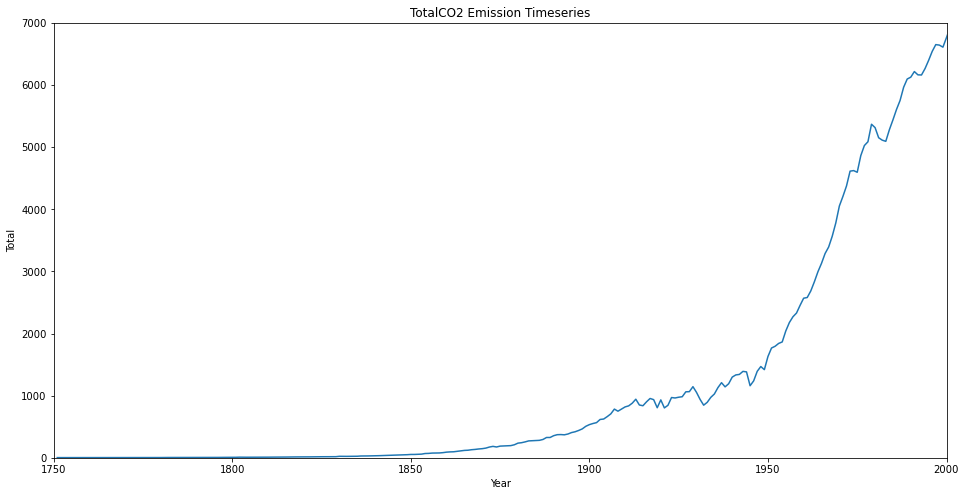

In [28]:
x = 'Year'
y = 'Total'

plt.figure(figsize=(16,8))
plt.title('TotalCO2 Emission Timeseries')
sns.lineplot(x=x, y=y, data=df)
plt.xlim(1750,2000)
plt.ylim(0,7000)
plt.show()

It would be nice to plot all the components, but first we need to melt the df

#### Melt df
We want to turn the wide df into a long df

In [14]:
to_melt = ['Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']

melted_df = df.melt(id_vars='Year', var_name='Type', value_vars=to_melt, value_name='Emissions')
melted_df.sort_values('Year').head(7)

,Year,Type,Emissions
0,1751,Total,3.0
1040,1751,Cement,0.0
780,1751,Solid Fuel,3.0
1300,1751,Gas Flaring,0.0
520,1751,Liquid Fuel,0.0
260,1751,Gas Fuel,0.0
1041,1752,Cement,0.0


Now we can use the 'Type' column as lineplot's 'hue' argument

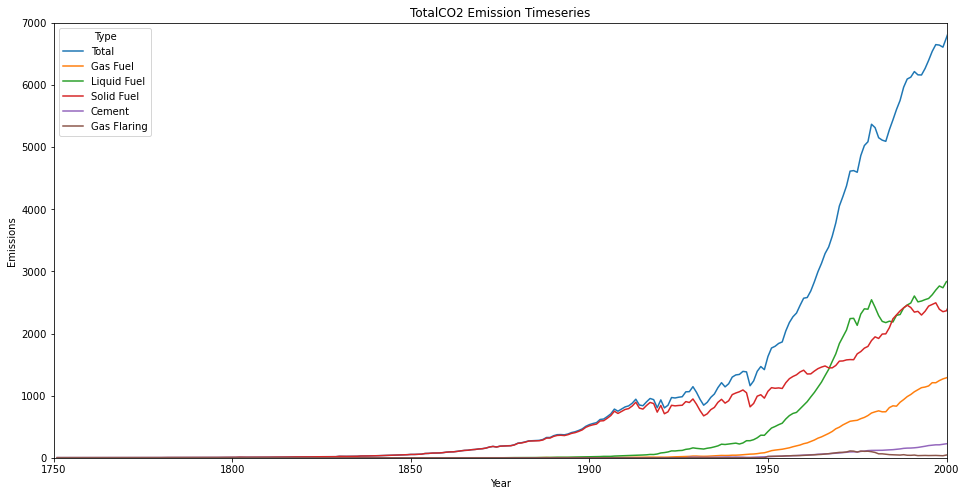

In [11]:
plt.figure(figsize=(16,8))
plt.title('TotalCO2 Emission Timeseries')
sns.lineplot(x='Year', y='Emissions', data=melted_df, hue='Type')
plt.xlim(1750,2000)
plt.ylim(0,7000)
plt.show()

Not only does this provide more information.. it's also much prettier. 